## Support vector Regressor Implementation

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Lets create synthetic data points

In [2]:
from sklearn.datasets import make_regression

In [3]:
x,y=make_regression(n_samples=1000, n_features=2, n_targets=1, noise=3.0) # noise : our datapoint are in same line.

In [6]:
x

array([[-1.58287538,  0.41962102],
       [ 1.30723226, -1.6171752 ],
       [ 0.19242316, -0.76155337],
       ...,
       [-0.22859107, -2.17061149],
       [-1.0122296 , -0.92511043],
       [ 0.65331607, -0.72978757]])

In [7]:
df=pd.DataFrame(x, columns=['f1','f2'])

In [8]:
df.head()

,f1,f2
0,-1.582875,0.419621
1,1.307232,-1.617175
2,0.192423,-0.761553
3,1.053834,-0.713014
4,-0.001279,2.436283


In [9]:
df['target']=y

In [10]:
df.head()

,f1,f2,target
0,-1.582875,0.419621,7.380238
1,1.307232,-1.617175,-128.622739
2,0.192423,-0.761553,-67.758306
3,1.053834,-0.713014,-45.876491
4,-0.001279,2.436283,230.333978


<AxesSubplot: xlabel='f1', ylabel='f2'>

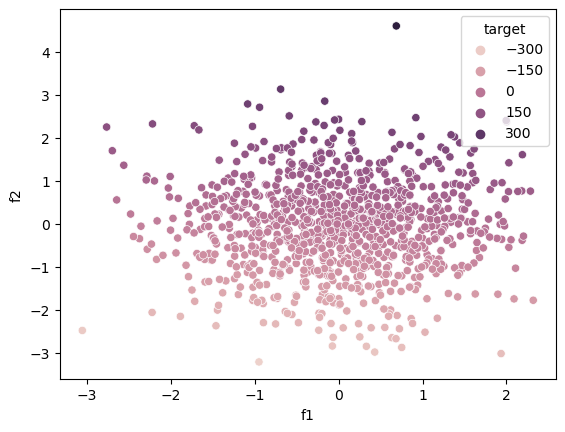

In [12]:
sns.scatterplot(x=df['f1'], y=df['f2'], hue=df['target'])

## Spliting the dataset into tarin and test

In [13]:
from sklearn.model_selection import train_test_split

In [15]:
x_train , x_test, y_train, y_test=train_test_split(x,y, test_size=0.25, random_state=42)

In [17]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((750, 2), (250, 2), (750,), (250,))

## Creating the SVR model

In [18]:
from sklearn.svm import SVR

In [19]:
obj_svr=SVR(kernel='linear')

In [20]:
obj_svr.fit(x_train, y_train)

SVR(kernel='linear')

In [22]:
y_predict=obj_svr.predict(x_test)

In [24]:
y_predict[0:20]

array([-146.63263923, -233.31817075,  -96.31228032,   25.31729822,
        -90.20056114,   54.0875065 , -187.13790332,  109.7568127 ,
        -74.1997164 ,  -38.62117933,   84.96846155, -103.70364906,
       -120.9139846 ,   11.42517242,   26.44974519,   -1.64825247,
          7.41484289,   45.35579267,  -14.29216459, -103.90903096])

In [28]:
from sklearn.metrics import r2_score

In [29]:
r2_score(y_test, y_predict)

0.9993147323679031

## Hyperparametere Tuning With SVC

In [32]:
from sklearn.model_selection import GridSearchCV

## Defing parameter range
param_grid={
    'C':[0.1, 1, 10, 100, 1000],
    'gamma':[1,0.1, 0.01, 0.001, 0.0001],
    'kernel':['linear'],
    'epsilon':[0.1, 0.2, 0.3]
}

In [33]:
grid=GridSearchCV(obj_svr, param_grid=param_grid, refit=True, cv=5, verbose=3.0)

In [34]:
grid.fit(x_train, y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.756 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.739 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.734 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.749 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.752 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.756 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.739 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.734 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.749 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.752 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma

GridSearchCV(cv=5, estimator=SVR(kernel='linear'),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'epsilon': [0.1, 0.2, 0.3],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             verbose=3.0)

In [35]:
grid.best_params_

{'C': 1000, 'epsilon': 0.3, 'gamma': 1, 'kernel': 'linear'}

In [36]:
print(r2_score(y_test, y_predict))

0.9993147323679031
